# O Passeio Aleatório 1D:

Comparação entre Simulação e Teoria

Um Passeio Aleatório 1D descreve o movimento de uma partícula que se desloca em uma linha reta, dando um passo para a direita (+1) ou para a esquerda (-1) a cada instante de tempo. Cada passo é independente do anterior e tem uma probabilidade igual de ocorrer (geralmente 0.5 para cada direção em um passeio simétrico).


#Binomial


A Distribuição Binomial é uma distribuição de probabilidade discreta que descreve o número de sucessos em uma sequência de $n$ ensaios independentes de Bernoulli, cada um com uma probabilidade $p$ de sucesso. No contexto do passeio aleatório 1D, podemos fazer uma conexão direta:

* Ensaios: Cada passo do passeio (`n_steps`) pode ser considerado um ensaio.
* Sucesso: Um "sucesso" pode ser definido como dar um passo para a direita (+1). A probabilidade de "sucesso" ($p$) é 0.5 para um passeio simétrico.
* Fracasso: Um "fracasso" seria dar um passo para a esquerda (-1), com probabilidade $1-p = 0.5$.

Se considerarmos que um passeio de $n$ passos tem $k$ passos para a direita e, consequentemente, $n-k$ passos para a esquerda, a posição final $X$ será dada por $X = k - (n-k) = 2k - n$.

A probabilidade de ter exatamente $k$ passos para a direita em $n$ passos é dada pela Função Massa de Probabilidade (PMF) da distribuição binomial:

$$P(K=k) = C(n, k) \cdot p^k \cdot (1-p)^{n-k}$$

Onde:
* $C(n, k)$ é o coeficiente binomial ("n escolhe k"), que representa o número de maneiras de obter $k$ sucessos em $n$ ensaios.
* $p$ é a probabilidade de um passo para a direita (0.5 no nosso caso).
* $k$ é o número de passos para a direita.


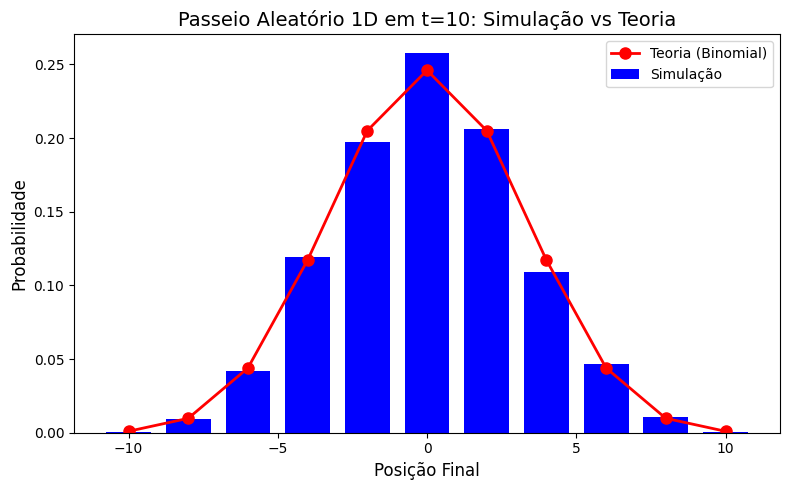

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parâmetros da simulação
n_simulations = 10**4   # Número de simulações
n_steps = 10            # Número de passos (tempo t=10)

# Simulação do passeio aleatório 1D
def random_walk_1d(n_steps):
    """Simula um passeio aleatório 1D com n_steps passos."""
    steps = np.random.choice([-1, 1], size=n_steps)
    return np.sum(steps)

# Executar múltiplas simulações
final_positions = np.array([random_walk_1d(n_steps) for _ in range(n_simulations)])

# Calcular as posições possíveis (sempre pares porque n_steps é par)
possible_positions = np.arange(-n_steps, n_steps + 1, 2)

# Calcular frequências observadas
observed_counts = np.array([np.sum(final_positions == pos) for pos in possible_positions])
observed_probs = observed_counts / n_simulations

# Calcular a distribuição teórica binomial
n = n_steps
k_values = (possible_positions + n) // 2  # Converter posição para número de passos à direita
theoretical_probs = binom.pmf(k_values, n, 0.5)

# Plotar os resultados
plt.figure(figsize=(8,5))
plt.bar(possible_positions, observed_probs, width=1.5, color='blue',label='Simulação')
plt.plot(possible_positions, theoretical_probs, 'ro-', linewidth=2, markersize=8, label='Teoria (Binomial)')

# Configurações do gráfico
plt.title('Passeio Aleatório 1D em t=10: Simulação vs Teoria', fontsize=14)
plt.xlabel('Posição Final', fontsize=12)
plt.ylabel('Probabilidade', fontsize=12)
plt.legend()
plt.tight_layout()


#Scaling

Coeficiente angular do ajuste linear: 0.9970 (teórico = 1.0)


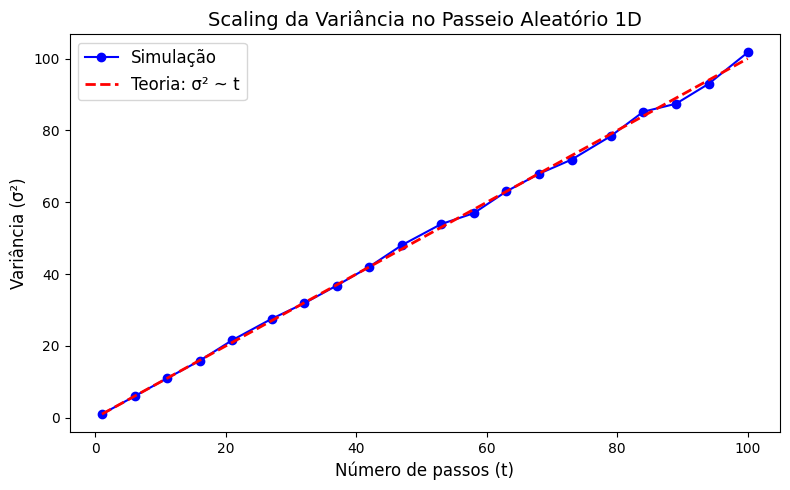

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros da simulação
n_simulations = 10**4  # Número de simulações para cada tempo
max_steps = 100        # Número máximo de passos a considerar
step_points = 20       # Número de pontos de tempo para avaliar

# Gerar tempos (passos) igualmente espaçados
time_points = np.linspace(1, max_steps, step_points, dtype=int)

# Simulação do passeio aleatório 1D
def simulate_random_walks(n_steps, n_simulations):
    """Simula múltiplos passeios aleatórios e retorna a variância da posição final."""
    final_positions = np.zeros(n_simulations)
    for i in range(n_simulations):
        steps = np.random.choice([-1, 1], size=n_steps)
        final_positions[i] = np.sum(steps)
    return np.var(final_positions)

# Calcular variâncias para diferentes tempos
simulated_variances = np.zeros(len(time_points))
for i, t in enumerate(time_points):
    simulated_variances[i] = simulate_random_walks(t, n_simulations)

# Resultado teórico: variância ~ número de passos
theoretical_variances = time_points

# Plotar os resultados
plt.figure(figsize=(8,5))
plt.plot(time_points, simulated_variances, 'bo-', label='Simulação', markersize=6)
plt.plot(time_points, theoretical_variances, 'r--', label='Teoria: σ² ~ t', linewidth=2)

# Configurações do gráfico
plt.title('Scaling da Variância no Passeio Aleatório 1D', fontsize=14)
plt.xlabel('Número de passos (t)', fontsize=12)
plt.ylabel('Variância (σ²)', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()

# Ajuste linear para verificar o scaling
coefficients = np.polyfit(time_points, simulated_variances, 1)
print(f"Coeficiente angular do ajuste linear: {coefficients[0]:.4f} (teórico = 1.0)")


#Gaussiana

   - Para N passos no tempo total t = N*dt
   - Variância total = N × variância de cada passo = 2Dt
   - Logo, variância de cada passo = 2Ddt
   - Desvio padrão = √variância = √(2Ddt)



> Introdução

O código abaixo simula a equação de difusão 1D usando o método de Monte Carlo com passeios aleatórios.

A equação de difusão é:

$$
\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2}
$$

Para uma condição inicial delta (todas as partículas concentradas na origem), a solução analítica é uma distribuição gaussiana:

$$
u(x,t) = \frac{1}{\sqrt{4\pi D t}} \exp\left(-\frac{x^2}{4Dt}\right)
$$

> Relação Entre Passeio Aleatório e Difusão


- N passos no tempo total t = N × dt
  - Onde:
    - `N` = número total de passos
    - `dt` = intervalo de tempo por passo


Para reproduzir corretamente a difusão:

1. Variância Total:
   - Pela solução analítica, a variância da gaussiana é  
    $$
     \sigma^2 = 2Ddt
     $$

   

2. Variância por Passo:
   - Como cada passo é independente:
     $$
     \text{Variância total} = N \times \text{Variância de cada passo} = 2Dt
     $$
   - Substituindo N = t/dt:
     $$
     \frac{t}{dt} \times \text{Var(passo)} = 2Dt
     $$
   - Portanto:
     $$
     \text{Var(passo)} = 2Ddt
     $$

3. Desvio Padrão do Passo:
   - O desvio padrão é a raiz quadrada da variância:
     $$
     \sigma_{\text{passo}} = \sqrt{2Ddt}
     $$
   - No código: `np.random.normal(0, np.sqrt(2*D*dt))`simula partículas fazendo passeios aleatórios com passos ∼ 𝒩(0, √(2Ddt))


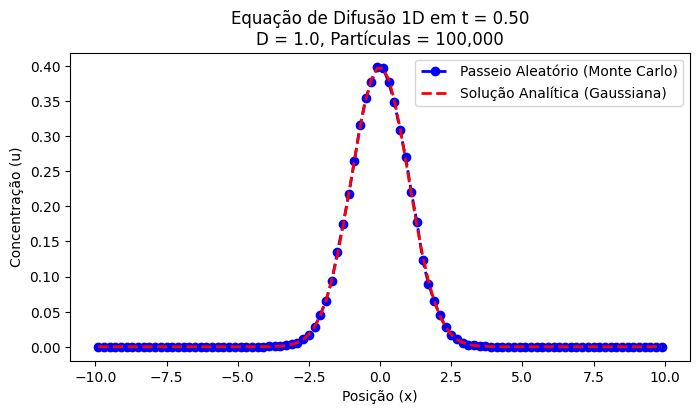

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import time

# Parâmetros da simulação
D = 1.0       # Coeficiente de difusão
L = 10.0      # Tamanho do domínio [-L, L]
Nx = 100      # Número de pontos espaciais
N_particles = 10**5  # Número de partículas
t_final = 0.5 # Tempo final da simulação
dx = 2 * L / Nx  # Passo espacial
dt = 0.01     # Passo temporal (para o passeio aleatório)

# Grade espacial
x = np.linspace(-L, L, Nx + 1)

# Inicializa as posições das partículas (todas começam em x=0 para condição inicial delta)
particles = np.zeros(N_particles)

# Função para realizar o passeio aleatório
def random_walk(particles, D, dt):
    # Cada partícula se move com um passo aleatório (movimento browniano)
    # O desvio padrão é sqrt(2*D*dt) - ver explicação no final do código
    steps = np.random.normal(0, np.sqrt(2 * D * dt), size=particles.shape)
    particles += steps
    return particles

# Função para calcular a solução analítica
def analytical_solution(x, t, D):
    # Solução exata da equação de difusão para condição inicial delta
    return (1 / np.sqrt(4 * np.pi * D * t)) * np.exp(-x**2 / (4 * D * t))

# Evolução temporal
current_time = 0.0
while current_time < t_final:
    particles = random_walk(particles, D, dt)
    current_time += dt

# Calcula a solução numérica a partir das posições das partículas
hist, bins = np.histogram(particles, bins=x, density=True)
x_centers = (bins[:-1] + bins[1:]) / 2  # Usa os centros dos bins para plotar

# Calcula a solução analítica
u_analytical = analytical_solution(x_centers, t_final, D)

# Plota os resultados
plt.figure(figsize=(8,4))
plt.plot(x_centers, hist, 'bo--', label='Passeio Aleatório (Monte Carlo)', linewidth=2)
plt.plot(x_centers, u_analytical, 'r--', label='Solução Analítica (Gaussiana)', linewidth=2)
plt.title(f'Equação de Difusão 1D em t = {t_final:.2f}\nD = {D}, Partículas = {N_particles:,}')
plt.xlabel('Posição (x)')
plt.ylabel('Concentração (u)')
plt.legend();
